In [1]:
# 불필요한 경고 출력을 방지
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression     # 선형회귀 모델
from sklearn.model_selection import train_test_split  # 학습 데이터와 테스트 데이터 분할
from sklearn.metrics import mean_squared_error

In [3]:
# 방법2 캐글에서 직접 다운로드해서 로딩하기
columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'price']
hpd_df = pd.read_csv('data/bostton_house_prices.csv', header=None, delimiter=r'\s+', names=columns)
hpd_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
hpd_df.shape

(506, 14)

<Axes: >

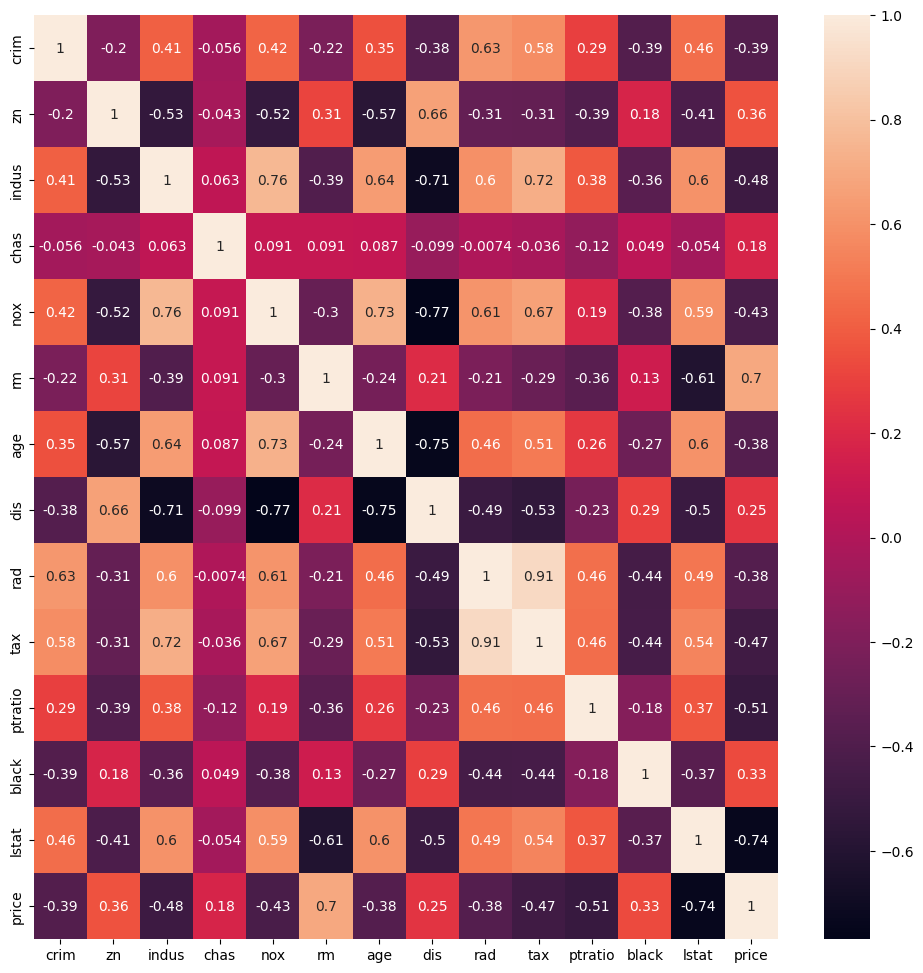

In [5]:
plt.figure(figsize=(12,12))
sns.heatmap(hpd_df.corr(), annot=True)

## KFold 교차 검증, 학습모델, 성능평가

In [6]:
import numpy as np
from sklearn.model_selection import KFold

X = np.array([[1,2], [3,4],[1,2],[3,4]])
y = np.array([1,2,3,4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)

print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [7]:
KFold(n_splits=2, random_state=None, shuffle = False)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"   Train: index={train_index}")
    print(f"   Test: index={test_index}")

Fold 0:
   Train: index=[2 3]
   Test: index=[0 1]
Fold 1:
   Train: index=[0 1]
   Test: index=[2 3]


## KFold 교차검증 데이터 준비

In [8]:
X_df = hpd_df.drop('price', axis=1)
y = hpd_df['price']

In [9]:
X_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [10]:
# K-fold 교차검증을 위해서 numpy 2d로 변경
X= X_df.values
print(type(X))
X[:2]

<class 'numpy.ndarray'>


array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]])

In [11]:
from sklearn.model_selection import KFold

# n_splits : validation split 갯수
# 매개변수 : shuffle = True, random_state = 40 
num_split = 5
# kf = KFold(n_splits=num_split)
kf = KFold(n_splits = num_split, shuffle = True, random_state=40)

tot_MSE = 0.0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model_lr = LinearRegression()
    
    model_lr.fit(X_train, y_train)
    
    y_pred = model_lr.predict(X_test)
    
    tot_MSE = tot_MSE + mean_squared_error(y_test, y_pred);
    
    # 평균 MSE 계산 (total_MSE / KF-split갯수)
MSE = tot_MSE / num_split
RMSE = np.sqrt(MSE)
print('MSE : {0:.5f}'.format(MSE))
print('RMSE : {0:.5f}'.format(RMSE))

MSE : 23.99167
RMSE : 4.89813


#### K-fold 기본으로 한 성능
 KFold(n_splits=5)

- MSE : 37.13181
- RMSE : 6.09359

In [12]:
print('회귀 계수 : ', np.round(model_lr.coef_, 2))
# print('회귀 계수 : ', model_lr.coef_, 2)
print('절편 값 : ', model_lr.intercept_)

회귀 계수 :  [-1.100e-01  5.000e-02  3.000e-02  3.300e+00 -1.637e+01  3.520e+00
  2.000e-02 -1.410e+00  3.000e-01 -1.000e-02 -9.000e-01  1.000e-02
 -6.400e-01]
절편 값 :  35.83791262574232


In [13]:
print('회귀 계수 : ', np.round(model_lr.coef_, 2))
#print('회귀 계수 : ', model_lr.coef_, 2)
print('절편 값 : ', model_lr.intercept_)

회귀 계수 :  [-1.100e-01  5.000e-02  3.000e-02  3.300e+00 -1.637e+01  3.520e+00
  2.000e-02 -1.410e+00  3.000e-01 -1.000e-02 -9.000e-01  1.000e-02
 -6.400e-01]
절편 값 :  35.83791262574232


<Axes: >

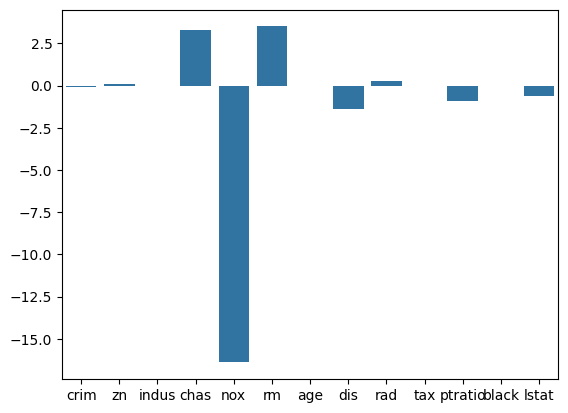

In [14]:
# 피처별 회귀 계수 값 확인, 시각화
coff = pd.Series(data=np.round(model_lr.coef_,1), index=X_df.columns)
coff.sort_values(ascending=False)
sns.barplot(coff)

## 유의미한 데이터 추출

### Feature Selection - 상관분석(Correlation Analysis)

In [15]:
hpd_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<Axes: >

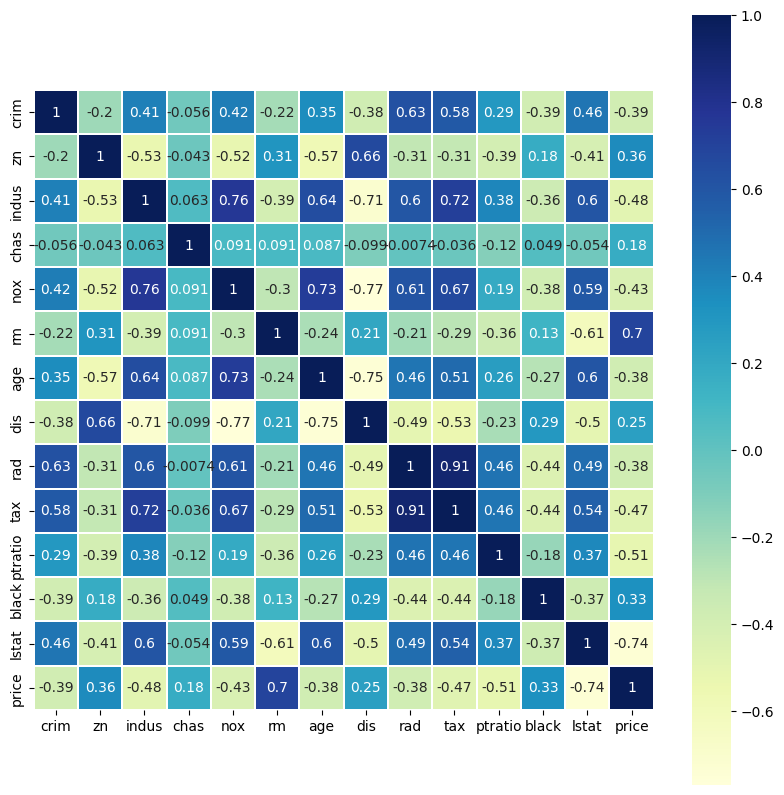

In [16]:
corr = hpd_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, linewidths=0.01, square=True, annot = True, cmap='YlGnBu')

In [17]:
X = hpd_df.drop('price', axis=1)
y = hpd_df['price']

In [18]:
X.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

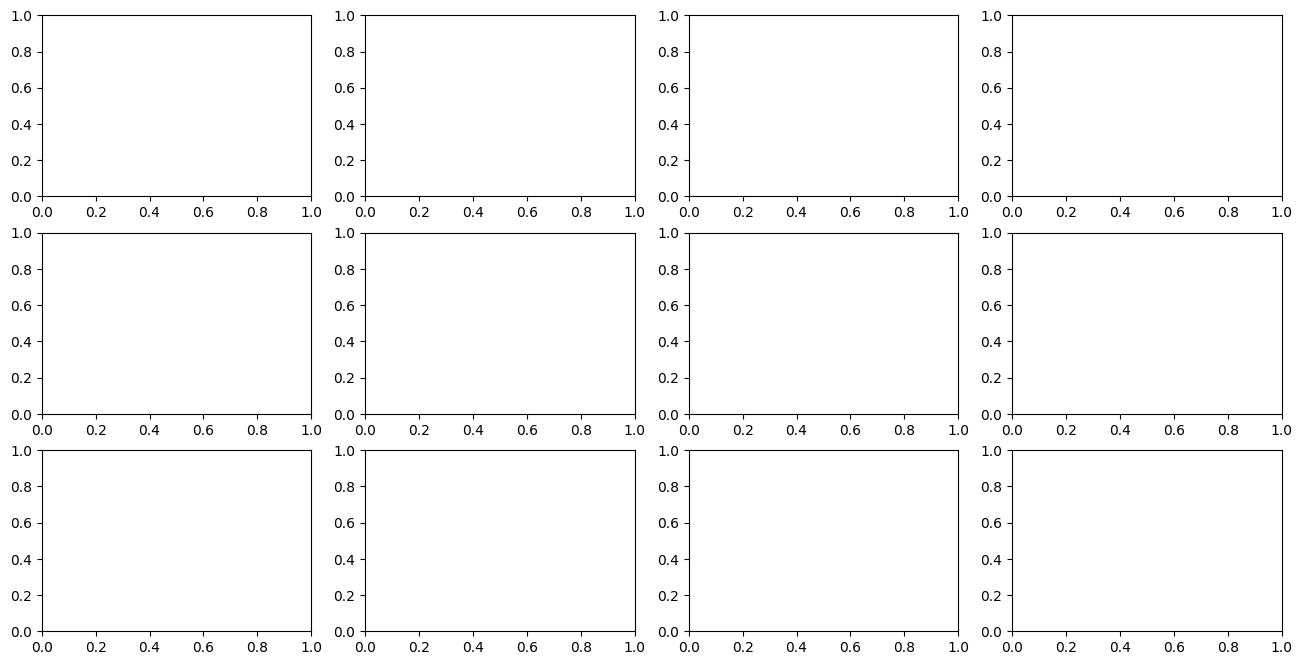

In [19]:
fig, axs =plt.subplots(figsize = [16,8], nrows = 3, ncols=4)
features = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']
            
axs= axs.flatten()
axs

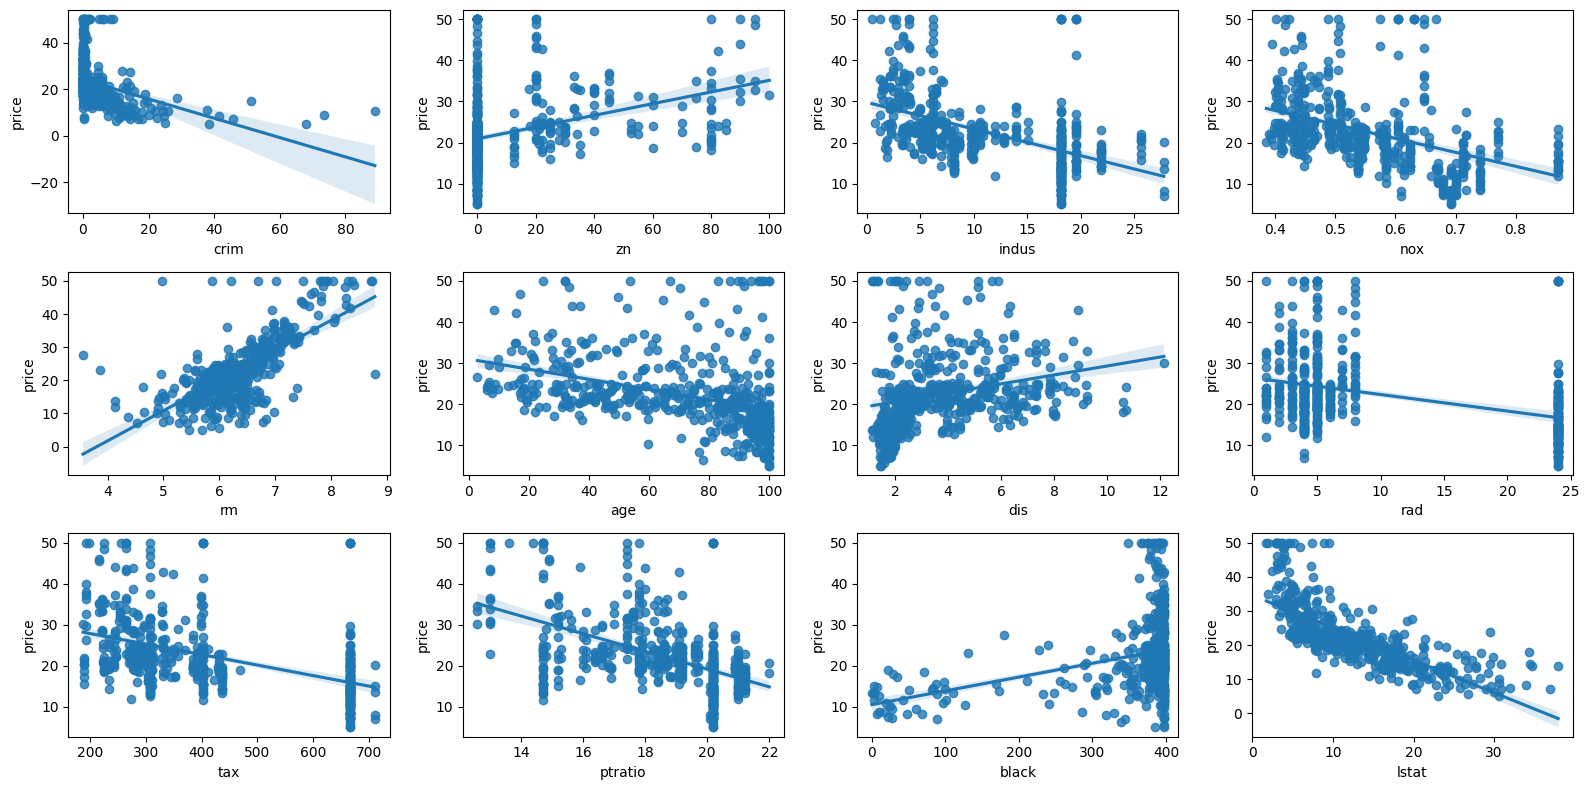

In [20]:
fig, axs = plt.subplots(figsize=[16,8], nrows=3, ncols=4)
features = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']

axs = axs.flatten() # 3*4 2D -> 1D 변경
for i, feature in enumerate(features):
    sns.regplot(data=hpd_df, x=feature, y='price', ax=axs[i])
    
plt.tight_layout() # 레이아웃 자동조절
plt.show()

### Feature Selection

 - 유의미한 Feature 들만을 남김


In [21]:
print(type(corr))
corr.head()

<class 'pandas.core.frame.DataFrame'>


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321


In [22]:
# price와 상관관계가 유의미한 것만 추출
corr.query("price > 0.5 or price < -0.5").index.values.tolist()


['rm', 'ptratio', 'lstat', 'price']

In [23]:

#corr 의 값이 price > 0.4 또는 price < -0.4 작은 feature list 추출
useful_feature_list = corr.query("price > 0.5 or price < -0.5").index.values.tolist()
useful_feature_list.remove('price')
print(useful_feature_list)

['rm', 'ptratio', 'lstat']


#### 데이터 준비 및 K-Fold 교차검증

In [41]:
# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, shuffle=True, random_state=2024)

# K-Fold 교차검증 실행
from sklearn.model_selection import cross_val_score   # KF 검증 함수
from sklearn.model_selection import KFold

num_split = 5
# n_splits : validation split 갯수
# 매개변수 추가해보기 : shuffle = True, random_state = 2024 
# kf = KFold(n_splits=num_split)
kf = KFold(n_splits=num_split, shuffle = True, random_state = 2024)  
tot_MSE = 0.0
for train_index, test_index in kf.split(X_train):
    X_train_kf, X_test_kf = X_train[train_index], X_train[test_index]
    y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]

    # 선형회귀(Linear Regression) 모델 선언하기
    model_lr4 = LinearRegression()
    # 선형회귀(Linear Regression) 모델 학습하기
    model_lr4.fit(X_train_kf, y_train_kf)
    # 테스트 데이터에 대한 예측을 수행함
    y_pred_kf = model_lr4.predict(X_test_kf)
    # MSE(Mean Squared Error) 합산 수행
    tot_MSE = tot_MSE + mean_squared_error(y_test_kf, y_pred_kf)

# 평균 MSE 계산 (total_MSE / KF-split갯수)
MSE = tot_MSE / num_split
RMSE = np.sqrt(MSE)
print('MSE : {0:.5f}'.format(MSE))
print('RMSE : {0:.5f}'.format(RMSE))

KeyError: "None of [Index([  0,   1,   3,   4,   6,   7,   8,  10,  11,  12,\n       ...\n       389, 390, 392, 395, 396, 397, 398, 401, 402, 403],\n      dtype='int64', length=323)] are in the [columns]"

In [31]:
from sklearn.metrics import r2_score
r2_model_lr = r2_score(y_test, y_pred)

## XGBoost Regressor

In [27]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [28]:
#MSE, RMSE 평가
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE,RMSE))

MSE : 12.71744, RMSE : 3.56615


In [32]:
r2_model_xgb = r2_score(y_test, y_pred)
r2_model_xgb

0.8681456721652223

In [33]:
# 학습모델 객체 생성
model_lr3 = LinearRegression()

# cv로 학습하기, model_lr3는 학습이 안됨
neg_mse_scores = cross_val_score(model_lr3, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
mse = (-1 * neg_mse_scores).mean()
rmse = np.sqrt(mse) #np.sqrt() : Square Root 계산

# cross_val_score(scoring="neg_mean_squared_err")로 반환된 값은 모두 음수임
print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds의 평균 MSE : ', np.round(mse, 5))
print('5 folds의 평균 RMSE : {0:.5f}'.format(rmse))

5 folds의 개별 Negative MSE scores:  [-30.48 -27.07 -31.68 -22.38 -13.5 ]
5 folds의 평균 MSE :  25.02084
5 folds의 평균 RMSE : 5.00208


In [34]:
# 오류가 나는 이유?
y_pred = model_lr3.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.